# **Controle da Inadimplência em Operações de Crédito**

## **1. Introdução**

### **1.1. Contexto**

A inadimplência em operações de crédito é um dos principais desafios enfrentados por instituições financeiras, cooperativas de crédito e empresas que atuam no setor de concessão de crédito. Nesse sentido, a inadimplência impacta diretamente na liquidez, rentabilidade e sustentabilidade do negócio, o que traz como consequência determinadas ações e práticas, como: monitoramento, análise e prevenção dos clientes interessados pela concessão.
Desta forma, a análise de dados surge como um ferramenta auxiliar e estratégica para o controle da inadimplência. Por meio dessa análise é possível identificar padrões de comportamento, perfis de risco, tendências de pagamento e fatores socioeconômicos que interferem diretamente na capacidade de adimplência dos clientes.

### **1.2. Objetivo**

O presente projeto tem como objetivo desenvolver uma abordagem analítica para auxiliar no controle da inadimplência em operações de crédito de uma fintech. O desenvolvimento do projeto é baseado em técnicas de análise estatística, visualização de dados e algoritmos de aprendizado de máquina. Desta forma, busca-se fornecer insights que contribuam para tomadas de decisão acertivas e orientadas na concessão de crédito.

### **1.3. Visão Regulatória**

#### **1.3.1. Gestão de Risco de Crédito - Resolução CMN nº 4.557/2017**

Estabelece diretrizes para a estrutura de gerenciamento de riscos em instituições financeiras. Além disso, exige a adoção de políticas e procedimentos que permitam identificar, mensura, avaliar e mitigar os riscos de forma contínua e eficaz.

#### **1.3.2. Lei Geral de Proteção de Dados Pessoais (LGPD) – Lei nº 13.709/2018**

Regulamenta o tratamento de dados pessoais por organizações públicas e privadas. Além disso, impõe uma série de requisitos, como: o consentimento do titular, finalidade específica do uso dos dados, transparência e direito dos usuários perante suas informações.

#### **1.3.3. Prevenção ao Superendividamento – Lei nº 14.181/2021**

Diretrizes que visam proteger o consumidor contra o superendividamento, reforçando a necessidade de avaliação responsável da capacidade de pagamento no momento da concessão de crédito.

#### **1.3.4. Open Finance e Responsabilidade nas Informações – Resolução BCB nº 32/2020 e Circular nº 4.015/2020**

Normas que regulamentam o compartilhamento padronizado de dados e serviços por meio do Open Finance, com o consentimento do cliente. Além disso, possui exigências quanto à governança, segurança da informação e qualidade dos dados compartilhados.

### **1.4. Bases de Dados Utilizadas**

#### **1.4.1. Importação das Bibliotecas Necessárias**



Primeiramente, importa-se as bibliotecas que serão utilizadas ao longo do projeto.

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from scipy import stats


#### **1.4.2. Importação da Base de Dados**

A base de dados utilizada neste projeto foi disponibilizada em um único arquivo no formato Excel(.xlsx), contendo duas abas distintas. A primeira apresenta os dados disponibilizados dos clientes da fintech. Já a segunda, apresenta a descrição de cada variável utilizada para a organização das informações dos clientes.
Desta forma, a leitura das duas abas foi realizada utilizando a biblioteca pandas no ambiente Python.

In [7]:
df = pd.read_excel('Base_Inadimplencia.xlsx', sheet_name='Base')

In [11]:
df_variaveis = pd.read_excel('Base_Inadimplencia.xlsx', sheet_name='Metadados')

#### **1.4.3. Contextualização da Base de Dados**

A base de dados utilizada no projeto contempla informações coletadas ao longo de um período de 1 (um) ano, referentes a 1.000 clientes atendidos pela fintech de concessão de crédito. O conjunto de dados é composto por 9 (nove) variáveis, que representam características individuais de cada cliente e aspectos relacionados ao seu comportamento de crédito. Essas variáveis incluem tanto dados cadastrais quanto indicadores da operação realizada com a empresa, os quais são fundamentais para a análise preditiva de inadimplência e para a construção de modelos analíticos que apoiem a tomada de decisão.



In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Idade                 1000 non-null   int64 
 1   Sexo                  1000 non-null   object
 2   Escolaridade          1000 non-null   object
 3   Tipo_Moradia          1000 non-null   object
 4   Saldo_Investimento    1000 non-null   object
 5   Saldo_Conta_Corrente  1000 non-null   object
 6   Valor_Emprestimo      1000 non-null   int64 
 7   Duracao_Emprestimo    1000 non-null   int64 
 8   Inadimplencia         1000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


#### **1.4.4. Descrição das Variáveis**

In [12]:
df_variaveis

,Variável,Descrição
0,Idade,Idade do cliente
1,Sexo,H: Homem e M: Mulher
2,Escolaridade,"Medio, Graduação e Pós Graduação;"
3,Tipo_Moradia,"Se mora de favor, paga aluguel ou tem casa pr..."
4,Saldo_Investimento,Se tomador possui alguma conta investimento e...
5,Saldo_Conta_Corrente,Se tomador possui alguma conta corrente em ou...
6,Valor_Emprestimo,valor do empréstimo pessoal solicitado;
7,Duracao_Emprestimo,Duração em meses do empréstimo pessoal solici...
8,Inadimplencia,1 se cliente ficou inadimplente em algum momen...


## **2. Metodologia**

#### **2.1. Técnicas Utilizadas**



*   **Estatística Descritiva:** Foram desenvolvidas e utilizadas tabelas de frequência, medidas-resumo (como média, mediana e desvio padrão), além de representações gráficas, com o objetivo de compreender o comportamento geral das variáveis e identificar possíveis outliers e padrões relevantes nos dados.
*   **Análise de Correlação:** A relação entre as variáveis foi avaliada por meio do cálculo do coeficiente de correlação de Pearson. Além disso, foi aplicada a técnica de Information Value (IV) para medir a relevância das variáveis preditoras na segmentação entre clientes adimplentes e inadimplentes.
*   **Modelagem Preditiva com Machine Learning:** Foram testados e aplicados modelos de aprendizado de máquina para prever a probabilidade de inadimplência dos clientes, utilizando técnicas supervisionadas. Entre os algoritmos utilizados, destacam-se modelos de classificação como Logistic Regression, Random Forest e XGBoost, avaliados com base em métricas como acurácia, precisão e recall.



### **2.2. Insights**

#### **2.2.1. Funções Desenvolvidas**

Com o objetivo de tornar o processo de análise mais eficiente e organizado, foram desenvolvidas funções personalizadas em Python para automatizar etapas repetitivas e garantir maior fluidez ao projeto. Essas funções permitem explorar rapidamente as variáveis da base de dados, seja por meio da verificação de distribuições, visualizações gráficas ou análises estatísticas simples.

In [71]:
def frequencia_variavel(df, chave_dicionario):
    """
    Calcula a distribuição percentual de uma variável categórica em um DataFrame.

    Parâmetros:
    df : pandas.DataFrame
        O DataFrame que contém os dados a serem analisados.

    chave_dicionario : str
        O nome da coluna (variável categórica) cujas frequências relativas serão calculadas.

    Retorno:
    pandas.Series
        Uma série contendo a distribuição percentual de cada categoria da variável selecionada.
        Os valores são arredondados para duas casas decimais e nomeados como 'Clientes'.
    """
    distribuicao_var = round(df[chave_dicionario].value_counts(normalize=True) * 100, 2)
    distribuicao_var.name = "Clientes"
    return distribuicao_var

In [36]:
def plotar_grafico_pizza(serie, variavel):
    """
    Gera um gráfico de pizza (pie chart) a partir de uma Series com valores percentuais.

    Parâmetros:
    serie : pandas.Series
        Série contendo os percentuais de cada categoria (ex: saída da função frequencia_variavel).

    variavel : str
        Título exibido no gráfico.

    Retorno:
    Nenhum. A função apenas exibe o gráfico.
    """
    plt.pie(serie, labels=serie.index, autopct='%1.1f%%', startangle=90)
    plt.title(f"Distribuição da Variável: {variavel}")
    plt.axis('equal')
    plt.show()

In [126]:
def frequencia_variavel_completa(df, chave_dicionario):
    """
    Calcula a distribuição de frequências com opção de ordenação personalizada.

    Parâmetros:
    ordem_personalizada : list, optional
        Lista com a ordem desejada das categorias
    """
    # Calcula frequência absoluta
    freq_abs = df[chave_dicionario].value_counts()

    # Calcula frequências relativas
    freq_rel = round(df[chave_dicionario].value_counts(normalize=True) * 100, 2)
    freq_rel_acum = freq_rel.cumsum().round(2)

    # Cria DataFrame com resultados
    resultado = pd.DataFrame({
        'Frequência Absoluta': freq_abs,
        'Frequência Relativa (%)': freq_rel,
        'Frequência Relativa Acumulada (%)': freq_rel_acum
    })

    return resultado

In [127]:
def plot_frequencias(df_frequencias, variavel, ordem=None):
    """
    Cria um gráfico combinado de barras (frequência absoluta) e linha (frequência acumulada)
    com recálculo correto da acumulada após ordenação.

    Parâmetros:
    df_frequencias : pandas.DataFrame
        DataFrame retornado pela função frequencia_variavel()
    variavel : str
        Nome da variável para título do gráfico
    ordem : list, optional
        Ordem personalizada das categorias (recalcula a acumulada se fornecido)
    """
    df_plot = df_frequencias.copy()
    if ordem is not None:
        ordem = [c for c in ordem if c in df_plot.index]
        df_plot = df_plot.loc[ordem]
        df_plot['Frequência Relativa Acumulada (%)'] = df_plot['Frequência Relativa (%)'].cumsum()

    fig, ax1 = plt.subplots()
    ax1.bar(df_plot.index.astype(str),
            df_plot['Frequência Absoluta'],
            color='blue')
    ax1.set_ylabel('Frequência Absoluta')
    ax1.tick_params(axis='y')

    ax2 = ax1.twinx()
    ax2.plot(df_plot.index.astype(str),
             df_plot['Frequência Relativa Acumulada (%)'],
             color='red', marker='o', linestyle='-',
             linewidth=2)
    ax2.set_ylabel('Frequência Acumulada (%)')
    ax2.tick_params(axis='y')
    ax2.grid(False)

    plt.title(f"Distribuição de Frequências: {variavel}")
    plt.tight_layout()
    plt.show()

In [148]:
def medidas_variavel(df, chave_dicionario):
    """
    Calcula estatísticas descritivas básicas para uma variável numérica em um DataFrame.

    Parâmetros:
    df : pandas.DataFrame
        DataFrame contendo os dados a serem analisados.
    chave_dicionario : str
        Nome da coluna numérica para a qual as estatísticas serão calculadas.

    Retorna:
    pandas.Series
        Série contendo as seguintes medidas estatísticas (em português e arredondadas para 2 casas decimais):
        - Mínimo: Valor mínimo observado
        - Máximo: Valor máximo observado
        - Média: Média aritmética dos valores
        - Mediana: Valor que divide a distribuição ao meio (percentil 50)
        - Desvio Padrão: Medida de dispersão dos dados

    Exemplo:
    >>> dados = pd.DataFrame({'idade': [25, 30, 35, 40, 45]})
    >>> medidas_variavel(dados, 'idade')
    Mínimo          25.00
    Máximo          45.00
    Média           35.00
    Mediana         35.00
    Desvio Padrão    7.91
    dtype: float64

    Observações:
    - A função trabalha apenas com variáveis numéricas
    - Valores ausentes (NaN) são automaticamente excluídos dos cálculos
    - O arredondamento é feito para 2 casas decimais para melhor legibilidade
    """
    medidas = df[chave_dicionario].agg(['min', 'max', 'mean', 'median', 'std']).round(2)
    medidas = medidas.rename(index={
          "min": "Mínimo",
          "max": "Máximo",
          "mean": "Média",
          "median": "Mediana",
          "std": "Desvio Padrão"
      })
    return medidas

In [145]:
def grafico_distribuicao(df, chave_dicionario, soma_max, faixa_valor):
    """
    Cria gráfico de distribuição com barras de frequência absoluta e linha de frequência acumulada.

    Parâmetros:
    df : pandas.DataFrame
        DataFrame com os dados
    chave_dicionario : str
        Nome da coluna numérica a ser analisada
    soma_max : int
        Valor máximo para o intervalo
    faixa_valor : int
        Tamanho de cada faixa de valor
    """
    df2 = df.copy()
    bins = range(df[chave_dicionario].min(), df[chave_dicionario].max() + soma_max, faixa_valor)
    df2[chave_dicionario] = pd.cut(df[chave_dicionario], bins=bins)

    freq = df2[chave_dicionario].value_counts().sort_index()
    freq_rel = (df2[chave_dicionario].value_counts(normalize=True).sort_index() * 100).round(2)
    freq_acum = freq_rel.cumsum()

    fig, ax1 = plt.subplots()
    sns.countplot(x=chave_dicionario, data=df2, ax=ax1, color='blue')
    ax1.set_title(f"Distribuição por {chave_dicionario}")
    ax1.set_xlabel('')
    ax1.set_ylabel("Quantidade")
    ax1.tick_params(axis='x', rotation=90)
    ax1.tick_params(axis='y')

    ax2 = ax1.twinx()
    ax2.plot(freq_acum.index.astype(str), freq_acum.values,
             color='red', marker='o', linestyle='-',
             linewidth=2)
    ax2.set_ylabel('Frequência Acumulada (%)')
    ax2.tick_params(axis='y')
    ax2.grid(False)

    plt.tight_layout()
    plt.show()

#### **2.2.2. Inadimplência**

Na base de dados disponibilizada pela fintech de concessão de crédito, observa-se que 30% dos clientes encontram-se inadimplentes, o que corresponde a 300 clientes com registros de atraso em seus pagamentos ao longo do período analisado. Esse dado evidencia um desafio significativo no controle de risco da carteira de crédito da empresa, tornando fundamental a aplicação de técnicas analíticas para identificar padrões de inadimplência e apoiar a tomada de decisões preventivas.

In [41]:
freq_inadimplencia = frequencia_variavel(df, "Inadimplencia")
freq_inadimplencia

,Clientes
Inadimplencia,
0,70.0
1,30.0


Para melhor observação, pode-se observar a distribuição dos clientes da empresa entre adimplentes e inadimplentes no gráfico a seguir (com o auxílio da biblioteca "matplot").

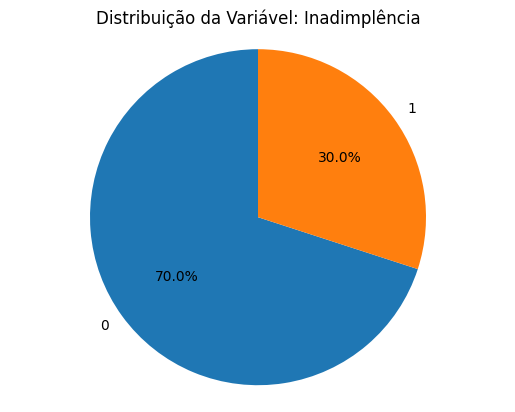

In [37]:
plotar_grafico_pizza(freq_inadimplencia, "Inadimplência")

#### **2.2.3. Sexo**

Na base de dados disponibilizada, observa-se que 69% dos clientes da fintech são mulheres, o que representa uma ampla maioria de pessoas do gênero feminino na carteira de clientes. Esse dado pode ser relevante para análises segmentadas de comportamento de crédito.

In [44]:
freq_sexo = frequencia_variavel(df, "Sexo")
freq_sexo

,Clientes
Sexo,
M,69.0
H,31.0


Para melhor observação, pode-se observar a distribuição dos clientes da empresa em relação ao gênero no gráfico a seguir (com o auxílio da biblioteca "matplot").

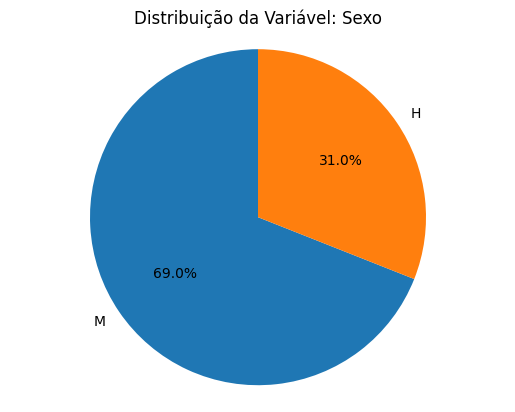

In [45]:
plotar_grafico_pizza(freq_sexo, "Sexo")

#### **2.2.4. Tipo de Moradia**

A partir da base de dados disponibilizada, observa-se que a grande maioria dos clientes possui casa própria, o que pode refletir maior estabilidade patrimonial entre os indivíduos analisados. Por outro lado, menos de 30% dos clientes vivem em moradia alugada ou de favor, indicando que esse grupo representa uma parcela menor da carteira.

In [46]:
freq_moradia = frequencia_variavel(df, "Tipo_Moradia")
freq_moradia

,Clientes
Tipo_Moradia,
Propria,71.3
Alugada,17.9
De favor,10.8


Para melhor observação, pode-se observar a distribuição dos clientes da empresa em relação ao tipo de moradia no gráfico a seguir (com o auxílio da biblioteca "matplot").

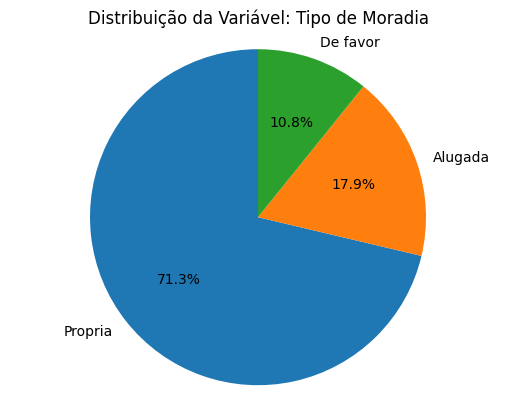

In [47]:
plotar_grafico_pizza(freq_moradia, "Tipo de Moradia")

#### **2.2.5. Escolaridade**

Na variável referente ao nível de escolaridade, observa-se que aproximadamente 85% dos clientes da base de dados possuem, no mínimo, ensino médio ou graduação. Em contrapartida, menos de 20% dos clientes apresentam formação em pós-graduação. Esse cenário indica que a maior parte da carteira de clientes possui um nível educacional intermediário, o que pode refletir diretamente em aspectos como renda, estabilidade profissional e comportamento financeiro.

In [130]:
freq_escolaridade = frequencia_variavel_completa(df, "Escolaridade")
freq_escolaridade

,Frequência Absoluta,Frequência Relativa (%),Frequência Relativa Acumulada (%)
Escolaridade,,,
Graduacao,630,63.0,63.0
Pos Graduacao,200,20.0,83.0
Ensino Medio,170,17.0,100.0


Para melhor observação, pode-se observar a distribuição dos clientes da empresa em relação à escolaridade no gráfico a seguir (com o auxílio da biblioteca "matplot").

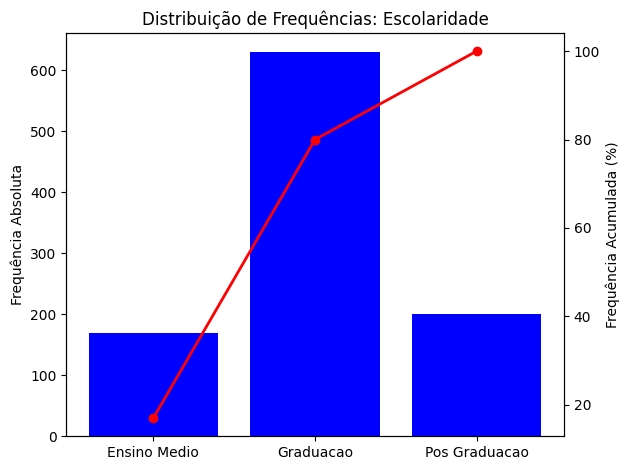

In [131]:
ordem_escolaridade = ['Ensino Medio', 'Graduacao', 'Pos Graduacao']
plot_frequencias(freq_escolaridade, "Escolaridade", ordem=ordem_escolaridade)

#### **2.2.6. Saldo Investimento**

Na variável referente ao nível de investimento dos clientes, observa-se que aproximadamente 80% da base possui poucos investimentos ou nenhum. Esse dado revela uma predominância de clientes com baixa participação em aplicações financeiras, o que pode indicar menor estabilidade econômica e maior vulnerabilidade a imprevistos financeiros.

In [128]:
freq_saldo = frequencia_variavel_completa(df, "Saldo_Investimento")
freq_saldo

,Frequência Absoluta,Frequência Relativa (%),Frequência Relativa Acumulada (%)
Saldo_Investimento,,,
Pouco,603,60.3,60.3
Sem investimento,183,18.3,78.6
Alto,111,11.1,89.7
Moderado,103,10.3,100.0


Para melhor observação, pode-se observar a distribuição dos clientes da empresa em relação ao saldo de investimento no gráfico a seguir (com o auxílio da biblioteca "matplot").

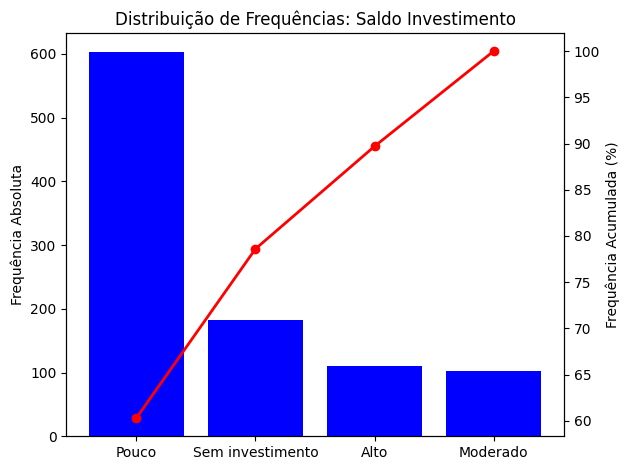

In [129]:
plot_frequencias(freq_saldo, "Saldo Investimento")

#### **2.2.7. Saldo da Conta Corrente**

Na variável referente ao saldo em conta corrente, observa-se que aproximadamente 70% dos clientes da fintech não possuem conta ou apresentam baixo saldo disponível. Em contraste, apenas cerca de 10% dos clientes possuem saldo elevado. Esse dado sugere uma predominância de clientes com baixa liquidez imediata, o que pode impactar negativamente sua capacidade de honrar compromissos financeiros em curto prazo.

In [133]:
freq_saldo = frequencia_variavel_completa(df, "Saldo_Conta_Corrente")
freq_saldo

,Frequência Absoluta,Frequência Relativa (%),Frequência Relativa Acumulada (%)
Saldo_Conta_Corrente,,,
Sem conta,394,39.4,39.4
Pouco,274,27.4,66.8
Moderado,224,22.4,89.2
Alto,108,10.8,100.0


Para melhor observação, pode-se observar a distribuição dos clientes da empresa em relação ao saldo da conta corrente no gráfico a seguir (com o auxílio da biblioteca "matplot").

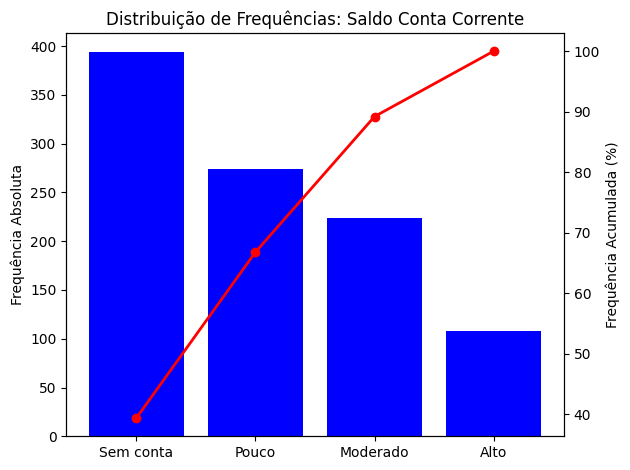

In [134]:
plot_frequencias(freq_saldo, "Saldo Conta Corrente")

#### **2.2.8. Valor Empréstimo**

Na variável relacionada aos valores de empréstimo, observa-se que os montantes concedidos variam entre 250 reais e aproximadamente 18.000 reais. A distribuição apresenta uma forte concentração de aproximadamente 80% dos clientes com valores até 4.250 reais, indicando uma predominância de operações de menor porte. O desvio padrão de 2.822 reais sugere uma variabilidade moderada nos valores concedidos, refletindo diferentes perfis de crédito dentro da base analisada.

In [149]:
medidas_variavel(df, "Valor_Emprestimo")

,Valor_Emprestimo
Mínimo,250.00
Máximo,18424.00
Média,3271.26
Mediana,2319.50
Desvio Padrão,2822.74


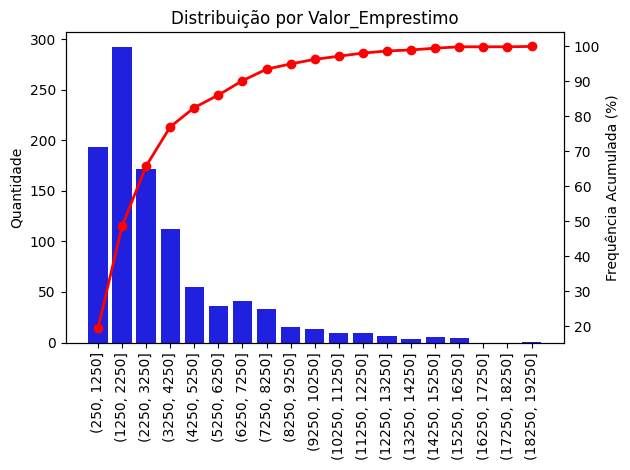

In [146]:
grafico_distribuicao(df, "Valor_Emprestimo", 1000, 1000)

#### **2.2.9. Duração Empréstimo**

Na variável referente à duração dos empréstimos disponibilizados, observa-se que o período mais curto é de 4 meses, enquanto o mais longo chega a 72 meses. A distribuição indica que cerca de 60% dos empréstimos têm duração entre 4 e 18 meses, sugerindo uma tendência a prazos mais curtos. O desvio padrão de aproximadamente 12 meses indica uma variação significativa nas durações dos empréstimos, o que refleti uma diversidade nas necessidades de prazos para quitação das dívidas por parte dos clientes.

In [150]:
medidas_variavel(df, "Duracao_Emprestimo")

,Duracao_Emprestimo
Mínimo,4.00
Máximo,72.00
Média,20.90
Mediana,18.00
Desvio Padrão,12.06


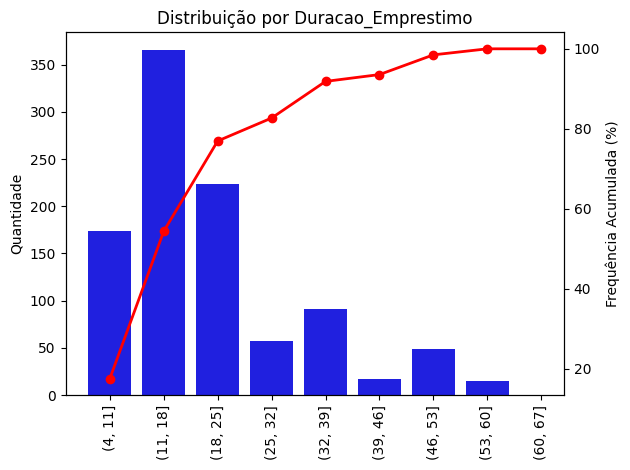

In [151]:
grafico_distribuicao(df, "Duracao_Emprestimo", 1, 7)

#### **2.2.10. Idade**

Na variável referente à idade dos clientes, observa-se que a idade mínima para a concessão de crédito é de 19 anos, enquanto a máxima é de 75 anos. A distribuição indica que cerca de 60% dos clientes possuem idades entre 19 e 34 anos, evidenciando uma concentração significativa em clientes mais jovens. O desvio padrão de 11 anos sugere uma variação considerável na faixa etária dos clientes, enquanto a mediana de 33 anos reforça que a maioria dos clientes está concentrada em uma faixa etária próxima à média.

In [154]:
medidas_variavel(df, "Idade")

,Idade
Mínimo,19.00
Máximo,75.00
Média,35.55
Mediana,33.00
Desvio Padrão,11.38


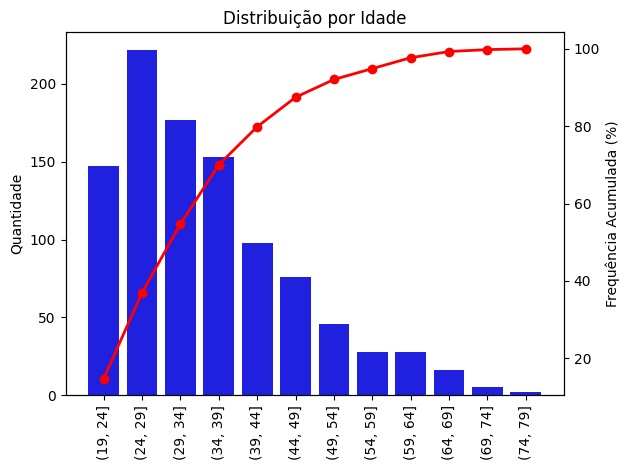

In [155]:
grafico_distribuicao(df, "Idade", 5, 5)

### **2.3. Resultados**

#### **2.3.1. Correlação entre as variáveis**

Com o intuito de observar a correlação entre as variáveis presentes na base de dados disponibilizada, foi desenvolvida uma função que calcula o nível de correlação entre as variáveis e identifica as variáveis qualitativas e quantitativas. Para realizar essa análise, foram utilizados três métodos distintos, cada um apropriado para o tipo de variável analisada:

1.   **Correlação de Pearson:** Utilizada para avaliar a correlação entre variáveis quantitativas. Esse método mede a relação linear entre duas variáveis, fornecendo um coeficiente que varia entre -1 (correlação negativa perfeita) e +1 (correlação positiva perfeita).
2.   **Cramer’s V:** Empregado para variáveis qualitativas. O índice de Cramer’s V é uma medida da associação entre duas variáveis categóricas, com valores que variam entre 0 e 1.
3. **ANOVA (Análise de Variância):** Utilizada para comparar uma variável qualitativa com uma variável quantitativa, verificando se existe diferença significativa nas médias das diferentes categorias da variável qualitativa.
Esses três métodos são responsáveis por proporcionar uma análise abrangente, permitindo identificar relações entre as variáveis, sejam elas quantitativas ou qualitativas, e entender melhor os fatores que influenciam os comportamentos dos clientes da fintech.



In [173]:
def heatmap_correlacao_mista(df, variaveis_quantitativas, variaveis_qualitativas):
    """
    Gera um heatmap de correlações entre variáveis qualitativas e quantitativas.

    Parâmetros:
    ----------
    df : pandas.DataFrame
        DataFrame contendo os dados
    variaveis_quantitativas : list
        Lista de nomes de colunas numéricas
    variaveis_qualitativas : list
        Lista de nomes de colunas categóricas

    Retorna:
    -------
    matplotlib.figure.Figure
        Objeto da figura contendo o heatmap
    """

    todas_variaveis = variaveis_quantitativas + variaveis_qualitativas
    corr_matrix = pd.DataFrame(index=todas_variaveis, columns=todas_variaveis)

    def cramers_v(x, y):
        matriz_confusao = pd.crosstab(x, y)
        chi2 = stats.chi2_contingency(matriz_confusao)[0]
        n = matriz_confusao.sum().sum()
        phi2 = chi2/n
        r,k = matriz_confusao.shape
        return np.sqrt(phi2 / min(k-1, r-1))

    for col1 in todas_variaveis:
        for col2 in todas_variaveis:
            if col1 == col2:
                corr_matrix.loc[col1, col2] = 1.0
            elif col1 in variaveis_quantitativas and col2 in variaveis_quantitativas:
                corr = df[[col1, col2]].corr().iloc[0,1]
            elif col1 in variaveis_qualitativas and col2 in variaveis_qualitativas:
                corr = cramers_v(df[col1], df[col2])
            else:
                qual, quant = (col1, col2) if col1 in variaveis_qualitativas else (col2, col1)
                agrupar = df.groupby(qual)[quant].apply(list)
                f_val = stats.f_oneway(*agrupar)[0]
                n = len(df)
                eta_sq = f_val / (f_val + (n - len(agrupar)))
                corr = eta_sq

            corr_matrix.loc[col1, col2] = corr
            corr_matrix.loc[col2, col1] = corr

    corr_matrix = corr_matrix.astype(float)

    fig, ax = plt.subplots()
    sns.heatmap(corr_matrix,
                annot=True,
                fmt=".2f",
                cmap='coolwarm',
                center=0,
                vmin=-1,
                vmax=1,
                ax=ax)

    ax.set_title('Heatmap de Correlações Mistas')
    plt.tight_layout()
    return fig

Para facilitar a interpretação visual das relações entre as variáveis presentes na base de dados, foi realizada a chamada da função correlacao_mista. A matriz resultante foi exibida de forma visual, permitindo uma análise mais intuitiva sobre o grau de associação entre as variáveis. A utilização de cores e intensidades distintas auxilia na identificação da força e da direção das correlações, tornando mais fácil reconhecer padrões e variáveis com possível impacto na inadimplência.

Observa-se que, de forma geral, as variáveis apresentam baixa correlação entre si. No entanto, destaca-se a relação entre as variáveis valor_emprestimo e duracao_emprestimo, que possuem um coeficiente de correlação de 0,62, indicando uma associação moderada positiva entre elas.

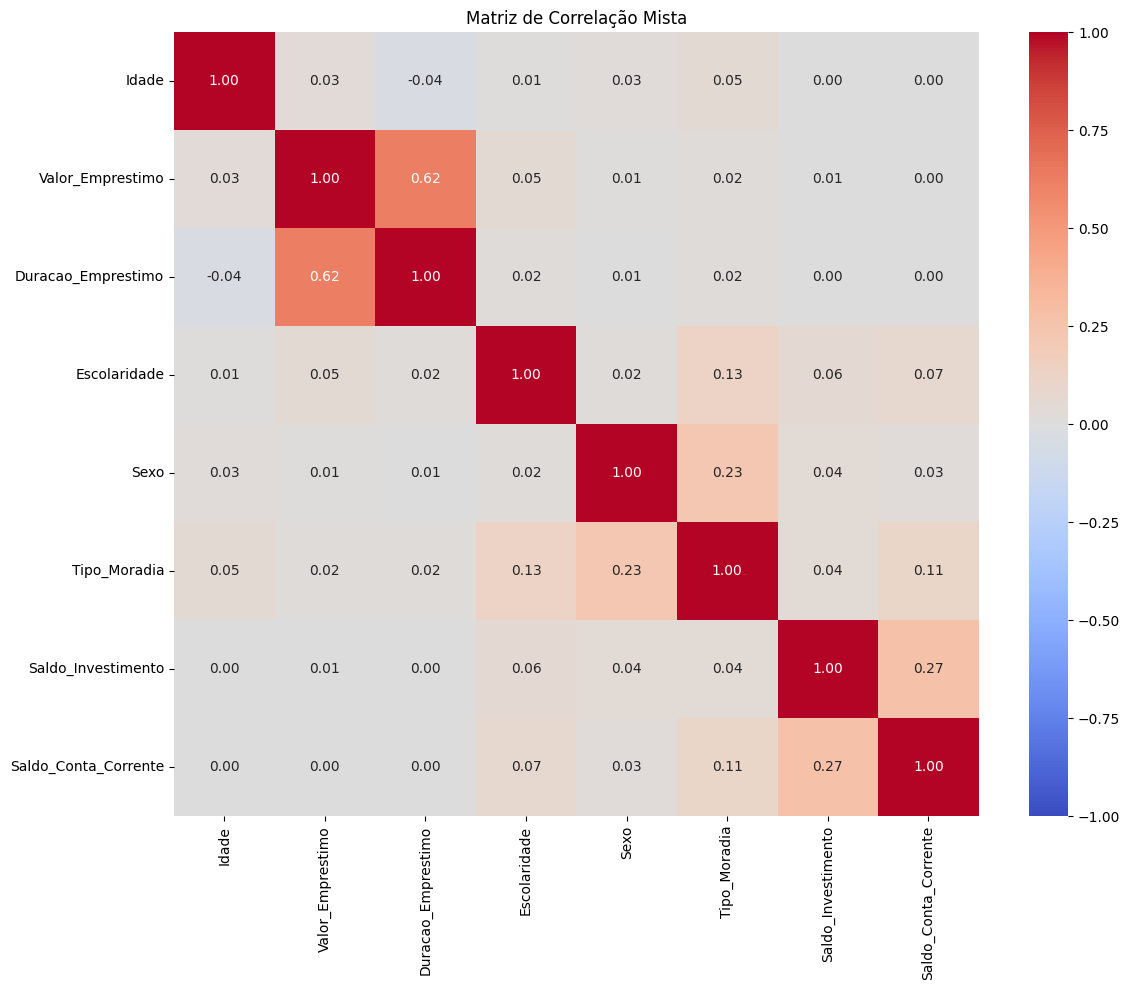

In [172]:
variaveis_qualitativas = ["Escolaridade", "Sexo", "Tipo_Moradia", "Saldo_Investimento", "Saldo_Conta_Corrente"]
variaveis_quantitativas = ["Idade", "Valor_Emprestimo", "Duracao_Emprestimo"]
matriz = correlacao_mista(df, variaveis_quantitativas, variaveis_qualitativas)
plt.show()

#### **2.3.2. Relação Variáveis e Inadimplência dos Clientes**

Com o objetivo de identificar a força das variáveis em relação à inadimplência dos clientes, foi utilizado o método Information Value (IV). Essa técnica permite quantificar o poder preditivo de cada variável na distinção entre clientes adimplentes e inadimplentes, possibilitando a identificação daquelas que devem ser analisadas com maior cautela no processo de concessão de crédito. Além disso, os resultados obtidos por meio do IV serão utilizados como base para o desenvolvimento do modelo de machine learning, servindo como técnica preditiva da inadimplência e contribuindo para a melhoria da assertividade na tomada de decisão.

Para o cálculo do IV, foram desenvolvidas duas funções personalizadas, uma para variáveis qualitativas e outra para variáveis quantitativas. O objetivo dessas funções é evitar repetições e tornar o projeto mais fluído na chamada de cada variável. Isso contribui para uma análise automatizada e padronizada ao longo do pipeline de modelagem, facilitando o cálculo do IV de maneira eficiente para diferentes tipos de dados.

In [207]:
lista_iv = []

In [208]:
def information_value_quant(df, chave_dicionario, chave_bin, soma_max=0, faixa_valor=0):
    """
    Calcula o Information Value (IV) para variáveis quantitativas usando lista_iv global.

    Parâmetros:
    ----------
    df : pandas.DataFrame
        DataFrame contendo os dados
    chave_dicionario : str
        Nome da coluna quantitativa a ser analisada
    chave_bin : str
        Nome da coluna binária (0/1) de referência
    soma_max : int, optional
        Valor adicional para o limite superior dos bins (padrão=0)
    faixa_valor : int, optional
        Tamanho dos intervalos para discretização (padrão=0)

    Retorna:
    -------
    tuple
        (tabela_formatada, iv_total_str)
        - tabela_formatada: DataFrame estilizado com as estatísticas
        - iv_total_str: IV total formatado como string
    """
    global lista_iv

    df2 = df.copy()
    bins = range(df[chave_dicionario].min() - 1, df[chave_dicionario].max() + soma_max, faixa_valor)
    df2[chave_dicionario] = pd.cut(df[chave_dicionario], bins=bins)

    tabela_iv = pd.crosstab(df2[chave_dicionario], df2[chave_bin], normalize="columns")

    tabela_iv['IV'] = 0.0
    mask = (tabela_iv[1] > 0) & (tabela_iv[0] > 0)
    tabela_iv.loc[mask, 'IV'] = ((tabela_iv.loc[mask, 1] - tabela_iv.loc[mask, 0]) *
                                np.log(tabela_iv.loc[mask, 1] / tabela_iv.loc[mask, 0])).round(4)

    tabela_iv['IV'] = tabela_iv['IV'].replace([np.inf, -np.inf], 0)
    iv_total = tabela_iv['IV'].sum().round(4)
    lista_iv.append({"Variável": chave_dicionario, "IV": iv_total})

    tabela_formatada = tabela_iv.style.format({
        0: '{:.1%}',
        1: '{:.1%}',
        'IV': '{:.4f}'
    })

    return tabela_formatada, f'{iv_total:.4f}'

In [209]:
def information_value_quali(df, chave_dicionario, chave_bin):
    """
    Calcula o Information Value (IV) para variáveis qualitativas usando lista_iv global.

    Parâmetros:
    ----------
    df : pandas.DataFrame
        DataFrame contendo os dados
    chave_dicionario : str
        Nome da coluna qualitativa a ser analisada
    chave_bin : str
        Nome da coluna binária (0/1) de referência

    Retorna:
    -------
    tuple
        (tabela_formatada, iv_total_str)
        - tabela_formatada: DataFrame estilizado com as estatísticas
        - iv_total_str: IV total formatado como string
    """
    global lista_iv

    tabela_iv = pd.crosstab(df[chave_dicionario], df[chave_bin], normalize="columns")

    tabela_iv['IV'] = 0.0
    mask = (tabela_iv[1] > 0) & (tabela_iv[0] > 0)
    tabela_iv.loc[mask, 'IV'] = ((tabela_iv.loc[mask, 1] - tabela_iv.loc[mask, 0]) *
                                np.log(tabela_iv.loc[mask, 1] / tabela_iv.loc[mask, 0])).round(4)

    tabela_iv['IV'] = tabela_iv['IV'].replace([np.inf, -np.inf], 0)
    iv_total = tabela_iv['IV'].sum().round(4)
    lista_iv.append({"Variável": chave_dicionario, "IV": iv_total})

    tabela_formatada = tabela_iv.style.format({
        0: '{:.1%}',
        1: '{:.1%}',
        'IV': '{:.4f}'
    })

    return tabela_formatada, f'{iv_total:.4f}'

##### **2.3.2.1. Idade**

Com um Information Value (IV) de aproximadamente 0,08, a variável idade é classificada como muito fraca segundo a métrica. Isso indica que essa variável possui baixa capacidade discriminatória para distinguir entre clientes inadimplentes e adimplentes, sendo, portanto, pouco relevante.

In [210]:
tabela_formatada, iv_total = information_value_quant(df, "Idade","Inadimplencia", 5, 5)

display(tabela_formatada)
print(f"\nInformation Value - Total: {iv_total}")

Inadimplencia,0,1,IV
Idade,,,
"(18, 23]",9.0%,14.0%,0.0221
"(23, 28]",21.3%,26.7%,0.0121
"(28, 33]",17.6%,19.7%,0.0024
"(33, 38]",18.4%,11.7%,0.0309
"(38, 43]",10.4%,9.7%,0.0006
"(43, 48]",8.4%,6.7%,0.0041
"(48, 53]",5.6%,3.7%,0.0080
"(53, 58]",3.6%,3.3%,0.0002
"(58, 63]",2.6%,2.7%,0.0000



Information Value - Total: 0.0853


##### **2.3.2.2. Duração Empréstimo**

Com um Information Value (IV) de aproximadamente 0,24, a variável duração do empréstimo é classificada como moderada, segundo a métrica. Isso indica que essa variável possui capacidade média para distinguir entre clientes inadimplentes e adimplentes, sendo, portanto, relevante na construção de modelos preditivos de inadimplência.

In [212]:
tabela_formatada, iv_total = information_value_quant(df, "Duracao_Emprestimo", "Inadimplencia", 10, 7)

display(tabela_formatada)
print(f"\nInformation Value - Total: {iv_total}")

Inadimplencia,0,1,IV
Duracao_Emprestimo,,,
"(3, 10]",20.6%,9.0%,0.0957
"(10, 17]",28.4%,21.0%,0.0225
"(17, 24]",32.7%,36.0%,0.0031
"(24, 31]",5.4%,6.3%,0.0014
"(31, 38]",6.9%,12.7%,0.0357
"(38, 45]",1.9%,3.0%,0.0055
"(45, 52]",3.0%,9.3%,0.0719
"(52, 59]",0.1%,0.3%,0.0016
"(59, 66]",1.0%,2.0%,0.0069



Information Value - Total: 0.2443


##### **2.3.2.3. Valor Empréstimo**

Com um Information Value (IV) de aproximadamente 0,14, a variável valor do empréstimo é classificada como moderada, segundo a métrica. Isso indica que essa variável possui capacidade média para distinguir entre clientes inadimplentes e adimplentes, sendo, portanto, relevante na construção de modelos preditivos de inadimplência.

In [213]:
tabela_formatada, iv_total = information_value_quant(df, "Valor_Emprestimo", "Inadimplencia", 1000, 1000)

display(tabela_formatada)
print(f"\nInformation Value - Total: {iv_total}")

Inadimplencia,0,1,IV
Valor_Emprestimo,,,
"(249, 1249]",19.0%,20.3%,0.0009
"(1249, 2249]",31.3%,24.3%,0.0175
"(2249, 3249]",18.6%,14.0%,0.0129
"(3249, 4249]",12.0%,9.3%,0.0067
"(4249, 5249]",4.6%,7.7%,0.0160
"(5249, 6249]",3.9%,3.0%,0.0022
"(6249, 7249]",3.4%,5.7%,0.0112
"(7249, 8249]",3.0%,4.0%,0.0029
"(8249, 9249]",1.3%,2.0%,0.0032



Information Value - Total: 0.1455


##### **2.3.2.4. Escolaridade**

Com um Information Value (IV) de aproximadamente 0,01, a variável escolaridade é classificada como muito fraca, segundo a métrica. Isso indica que essa variável não possui capacidade de distinguir entre clientes inadimplentes e adimplentes, sendo, portanto, irrelevante na construção de modelos preditivos de inadimplência.

In [214]:
tabela_formatada, iv_total = information_value_quali(df, "Escolaridade", "Inadimplencia")

display(tabela_formatada)
print(f"\nInformation Value - Total: {iv_total}")

Inadimplencia,0,1,IV
Escolaridade,,,
Ensino Medio,16.0%,19.3%,0.0063
Graduacao,63.4%,62.0%,0.0003
Pos Graduacao,20.6%,18.7%,0.0019



Information Value - Total: 0.0085


##### **2.3.2.5. Sexo**

Com um Information Value (IV) de aproximadamente 0,02, a variável sexo é classificada como muito fraca, segundo a métrica. Isso indica que essa variável não possui capacidade de distinguir entre clientes inadimplentes e adimplentes, sendo, portanto, irrelevante na construção de modelos preditivos de inadimplência.

In [215]:
tabela_formatada, iv_total = information_value_quali(df, "Sexo", "Inadimplencia")

display(tabela_formatada)
print(f"\nInformation Value - Total: {iv_total}")

Inadimplencia,0,1,IV
Sexo,,,
H,28.7%,36.3%,0.0179
M,71.3%,63.7%,0.0086



Information Value - Total: 0.0265


##### **2.3.2.6. Tipo de Moradia**

Com um Information Value (IV) de aproximadamente 0,08, a variável tipo de moradia é classificada como fraca, segundo a métrica. Isso indica que essa variável não possui capacidade de distinguir entre clientes inadimplentes e adimplentes, sendo, portanto, irrelevante na construção de modelos preditivos de inadimplência.

In [216]:
tabela_formatada, iv_total = information_value_quali(df, "Tipo_Moradia", "Inadimplencia")

display(tabela_formatada)
print(f"\nInformation Value - Total: {iv_total}")

Inadimplencia,0,1,IV
Tipo_Moradia,,,
Alugada,15.6%,23.3%,0.0314
De favor,9.1%,14.7%,0.0261
Propria,75.3%,62.0%,0.0258



Information Value - Total: 0.0833


##### **2.3.2.7. Saldo de Investimento**

Com um Information Value (IV) de aproximadamente 0,19, a variável saldo de investimento é classificada como moderada, segundo a métrica. Isso indica que essa variável possui capacidade média para distinguir entre clientes inadimplentes e adimplentes, sendo, portanto, relevante na construção de modelos preditivos de inadimplência.

In [217]:
tabela_formatada, iv_total = information_value_quali(df, "Saldo_Investimento", "Inadimplencia")

display(tabela_formatada)
print(f"\nInformation Value - Total: {iv_total}")

Inadimplencia,0,1,IV
Saldo_Investimento,,,
Alto,13.4%,5.7%,0.0670
Moderado,9.9%,11.3%,0.0021
Pouco,55.1%,72.3%,0.0466
Sem investimento,21.6%,10.7%,0.0768



Information Value - Total: 0.1925


##### **2.3.2.8. Saldo Conta Corrente**

Com um Information Value (IV) de aproximadamente 0,72, a variável saldo de conta corrente é classificada como muito forte, segundo a métrica. Isso indica que essa variável possui capacidade alta para distinguir entre clientes inadimplentes e adimplentes, sendo, portanto, extremamente relevante na construção de modelos preditivos de inadimplência.

In [218]:
tabela_formatada, iv_total = information_value_quali(df, "Saldo_Conta_Corrente", "Inadimplencia")

display(tabela_formatada)
print(f"\nInformation Value - Total: {iv_total}")

Inadimplencia,0,1,IV
Saldo_Conta_Corrente,,,
Alto,12.4%,7.0%,0.0312
Moderado,18.0%,32.7%,0.0874
Pouco,19.9%,45.0%,0.2057
Sem conta,49.7%,15.3%,0.4044



Information Value - Total: 0.7287


##### **2.3.2.9. Resultado das Relações**

Com o cálculo do IV de todas as variáveis, é possível identificar aquelas que serão mais importantes para determinar e desenvolver o modelo preditivo com machine learning. Desta forma, observado o dataframe criado, destacam-se as variáveis: **Saldo_Conta_Corrente, Duracao_Emprestimo, Saldo_Investimento e Valor_Emprestimo**, que apresentam os maiores valores de IV e, portanto, possuem maior poder discriminativo na distinção entre clientes adimplentes e inadimplentes. Essas variáveis serão, portanto, as mais relevantes para a construção do modelo, servindo como base para a previsão da inadimplência.

In [219]:
df_iv = pd.DataFrame(lista_iv).sort_values(by="IV", ascending=False)
df_iv

,Variável,IV
7,Saldo_Conta_Corrente,0.7287
1,Duracao_Emprestimo,0.2443
6,Saldo_Investimento,0.1925
2,Valor_Emprestimo,0.1455
0,Idade,0.0853
5,Tipo_Moradia,0.0833
4,Sexo,0.0265
3,Escolaridade,0.0085


#### **2.3.3. Modelos Preditivos de Inadimplência**

##### **2.3.3.1. Organização dos Dados**

Para organizar e padronizar a base de dados, foram aplicadas técnicas de codificação de variáveis categóricas, como One-Hot Encoding (para variáveis nominais) e codificação ordinal (para variáveis com hierarquia). Essas transformações são essenciais para viabilizar o desenvolvimento dos modelos preditivos, uma vez que algoritmos de machine learning requerem que todas as variáveis estejam em formato numérico.

Assim, foi criado um novo dataframe contendo os dados organizados e codificados, possibilitando um pipeline de modelagem mais estruturado e eficiente.

In [221]:
df_adaptado = df.copy()

In [222]:
codificacao = {'Sem investimento': 0, "Pouco": 1, "Moderado": 2, "Alto": 3}
df_adaptado['Saldo_Investimento'] = df_adaptado['Saldo_Investimento'].str.strip().map(codificacao)

In [223]:
codificacao = {'Sem conta': 0, "Pouco": 1, "Moderado": 2, "Alto": 3}
df_adaptado['Saldo_Conta_Corrente'] = df_adaptado['Saldo_Conta_Corrente'].str.strip().map(codificacao)

In [224]:
df_adaptado.index.name = "Cliente_ID"
df_adaptado = df_adaptado.reset_index()

##### **2.3.3.2. Modelos Desenvolvidos**

Para o desenvolvimento dos modelos de machine learning voltados à identificação de possíveis clientes inadimplentes, foram utilizados e comparados quatro algoritmos supervisionados: Random Forest, Árvore de Decisão, Regressão Logística e XGBoost.



*   **Regressão Logística:** é um modelo estatístico utilizado para prever a probabilidade de ocorrência de um evento binário (como inadimplência ou não).
*   **Árvore de Decisão:** constrói uma estrutura em formato de árvore, onde as decisões são tomadas com base em perguntas sobre os dados.
*   **Random Forest:** é um modelo baseado em múltiplas árvores de decisão, onde o resultado final é obtido por meio da média ou votação das previsões de cada árvore.
*   **XGBoost (Extreme Gradient Boosting):** é um modelo de aprendizado por reforço que combina várias árvores fracas para formar um modelo robusto.

Na comparação entre esses modelos, considerando os 1.000 clientes da base de dados, o XGBoost apresentou o melhor desempenho, demonstrando maior capacidade preditiva para identificar corretamente os clientes com maior risco de inadimplência. Pode-se perceber esse fato, de acordo com o dataframe a seguir com os valores de acurácia, precisão, recall e AUC de cada modelo.

In [ ]:
df_resultados = pd.DataFrame(resultados_modelos)
df_resultados.sort_values(by='AUC', ascending=False, inplace=True)
df_resultados

,Modelo,Acurácia,Precisão,Recall,AUC
2,Random Forest,0.761,0.569476,0.833333,0.838207
3,XGBoost,0.783,0.604534,0.800000,0.823305
1,Árvore de Decisão,0.635,0.420538,0.573333,0.676583
0,Regressão Logística,0.635,0.420538,0.573333,0.676583


##### **2.3.3.2. Modelo Selecionado**

Com a escolha do modelo XGBoost, foi possível realizar ajustes e otimizações que permitiram alcançar resultados satisfatórios. No entanto, é importante destacar que alguns fatores limitaram a performance inicial do modelo, como o tamanho reduzido da base de dados e a distribuição desbalanceada das classes.

Para mitigar esses efeitos e tornar o modelo mais robusto, foi empregada a técnica de resample, que busca equilibrar a proporção das classes e melhorar o desempenho preditivo.

Além disso, foram utilizadas apenas as variáveis que apresentaram níveis satisfatórios de Information Value (IV), garantindo que apenas os atributos mais relevantes e com maior capacidade preditiva fossem considerados na construção do modelo. Essa seleção contribuiu para uma modelagem mais eficiente e focada nos fatores que realmente influenciam o risco de inadimplência.

*  **Acurácia: 0.7980**
*   **Precisão: 0.6310**
*   **Recall: 0.7867**
*   **AUC: 0.8233**

Esses valores indicam uma boa capacidade do modelo em identificar corretamente clientes inadimplentes, mantendo uma taxa aceitável de falsos positivos.

Além disso, foi construída uma matriz de confusão, permitindo a visualização clara dos acertos e erros do modelo, o que auxilia na avaliação da efetividade da abordagem implementada. Cabe ressaltar que foram utilizadas bibliotecas para o desenvolvimento do modelo e da matriz de confusão.

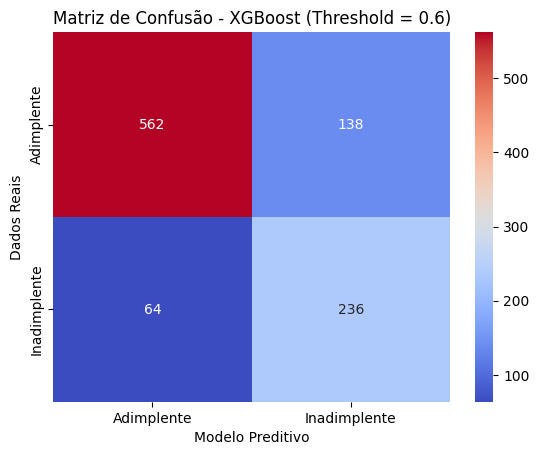


Acurácia : 0.7980
Precisão : 0.6310
Recall   : 0.7867
AUC      : 0.8233


In [230]:
# Importação das bibliotecas necessárias
# XGBoost para o modelo de machine learning
# Métricas do sklearn para avaliação de desempenho
# Resample para balanceamento das classes
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.utils import resample

"""
DEFINIÇÃO DAS VARIÁVEIS DO MODELO

Seleciona as features relevantes para a previsão de inadimplência e separa os dados em:
- X: matriz de características (variáveis preditoras)
- y: vetor alvo (variável resposta binária)
"""
variaveis = ['Saldo_Conta_Corrente', 'Duracao_Emprestimo', 'Saldo_Investimento', 'Valor_Emprestimo']
X = df_adaptado[variaveis]
y = df_adaptado['Inadimplencia']

"""
BALANCEAMENTO DAS CLASSES

Divide o dataset em adimplentes e inadimplentes, então aplica undersampling para criar
um conjunto balanceado com 150 amostras de cada classe, garantindo igual representação.
"""
df_adimplente = df_adaptado[df_adaptado['Inadimplencia'] == 0]
df_inadimplente = df_adaptado[df_adaptado['Inadimplencia'] == 1]

df_sample_adimplente = resample(df_adimplente, replace=False, n_samples=150, random_state=42)
df_sample_inadimplente = resample(df_inadimplente, replace=False, n_samples=150, random_state=42)
df_balanceado = pd.concat([df_sample_adimplente, df_sample_inadimplente])

"""
PREPARAÇÃO DOS DADOS DE TREINO

Utiliza o dataset balanceado para treinar o modelo, garantindo que ele não fique enviesado
para a classe majoritária.
"""
X_train = df_balanceado[variaveis]
y_train = df_balanceado['Inadimplencia']

"""
TREINAMENTO DO MODELO XGBOOST

Configura e treina um classificador XGBoost com:
- eval_metric='logloss': usa log loss como métrica de avaliação
- random_state=42: garante reprodutibilidade dos resultados
"""
modelo_xgb = XGBClassifier(eval_metric='logloss', random_state=42)
modelo_xgb.fit(X_train, y_train)

"""
PREDIÇÃO E CLASSIFICAÇÃO

Gera probabilidades de inadimplência e aplica um threshold de 0.6 para converter
as probabilidades em classificações binárias (0 ou 1).
"""
y_proba = modelo_xgb.predict_proba(X)[:, 1]
threshold = 0.6
y_pred = (y_proba >= threshold).astype(int)

"""
CÁLCULO DAS MÉTRICAS DE DESEMPENHO

Avalia o modelo usando quatro métricas principais
"""
acc = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred)
rec = recall_score(y, y_pred)
auc = roc_auc_score(y, y_proba)

"""
VISUALIZAÇÃO DA MATRIZ DE CONFUSÃO
"""
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=['Adimplente', 'Inadimplente'],
            yticklabels=['Adimplente', 'Inadimplente'])
plt.xlabel("Modelo Preditivo")
plt.ylabel("Dados Reais")
plt.title(f"Matriz de Confusão - XGBoost (Threshold = {threshold})")
plt.show()

"""
EXIBIÇÃO DAS MÉTRICAS

Mostra os resultados das métricas de avaliação formatados com 4 casas decimais
para facilitar a comparação e análise de desempenho.
"""
print(f"\nAcurácia : {acc:.4f}")
print(f"Precisão : {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"AUC      : {auc:.4f}")

## **3. Conclusão**

Neste projeto, foi desenvolvido um modelo preditivo para identificar clientes com maior risco de inadimplência em uma base de dados de uma fintech. A análise inicial das variáveis revelou que, com base no método Information Value (IV), algumas variáveis, como Saldo_Conta_Corrente, Duracao_Emprestimo, Saldo_Investimento e Valor_Emprestimo, apresentaram valores de IV significativos, indicando que são as mais relevantes para o modelo preditivo. Essas variáveis foram, portanto, selecionadas para a construção do modelo.

Com a escolha do XGBoost, um dos modelos de machine learning mais poderosos e eficientes, foi possível realizar ajustes e otimizações que possibilitaram o alcance de resultados satisfatórios. Durante o processo, desafios foram superados, como o tamanho reduzido da base de dados e a distribuição desbalanceada das classes entre clientes inadimplentes e adimplentes. Para contornar essas limitações, a técnica de resample foi aplicada, equilibrando a proporção entre as classes e aumentando a robustez do modelo.

Os valores obtidos demonstram que o modelo tem uma boa capacidade de identificar corretamente clientes inadimplentes, com uma taxa aceitável de falsos positivos. O uso das variáveis mais relevantes, identificadas pelo IV, contribuiu para o bom desempenho do modelo, focando apenas nos atributos que realmente impactam o risco de inadimplência.

Em conclusão, o modelo desenvolvido oferece uma ferramenta eficaz para a identificação de clientes inadimplentes, utilizando técnicas avançadas de machine learning e uma seleção de variáveis baseada em análise estatística. Apesar das limitações iniciais, os resultados demonstram que a abordagem escolhida pode ser aplicada de forma prática na fintech, contribuindo para a redução do risco de inadimplência e a melhoria da tomada de decisão na concessão de crédito.